In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns

In [37]:
df = pd.read_csv("data/nycflights_tratada.csv")
df.head()

,data_voo,companhia_formatted,id_voo_formatted,id_aeronave_formatted,datetime_partida_formatted,datetime_chegada_formatted,origem_formatted,destino_formatted,tempo_voo,distancia,tempo_voo_esperado,tempo_voo_hr,atraso,dia_semana,horario,flg_status
0,2013-01-01,DL,461,N668DN,2013-01-01 05:54:00,2013-01-01 08:12:00,LGA,ATL,116.0,762.0,2.300000,1.933333,-0.366667,1,MADRUGADA,ONTIME
1,2013-01-01,B6,507,N516JB,2013-01-01 05:55:00,2013-01-01 09:13:00,EWR,FLL,158.0,1065.0,3.300000,2.633333,-0.666667,1,MADRUGADA,ONTIME
2,2013-01-01,B6,79,N593JB,2013-01-01 05:57:00,2013-01-01 08:38:00,JFK,MCO,140.0,944.0,2.683333,2.333333,-0.350000,1,MADRUGADA,ONTIME
3,2013-01-01,AA,301,N3ALAA,2013-01-01 05:58:00,2013-01-01 07:53:00,LGA,ORD,138.0,733.0,1.916667,2.300000,0.383333,1,MADRUGADA,ONTIME
4,2013-01-01,B6,49,N793JB,2013-01-01 05:58:00,2013-01-01 08:49:00,JFK,PBI,149.0,1028.0,2.850000,2.483333,-0.366667,1,MADRUGADA,ONTIME


## Pergunta 1
* Qual(s) a(s) companhia(s) que mais registram atrasos? Analise qualitativamente e quantitativamente


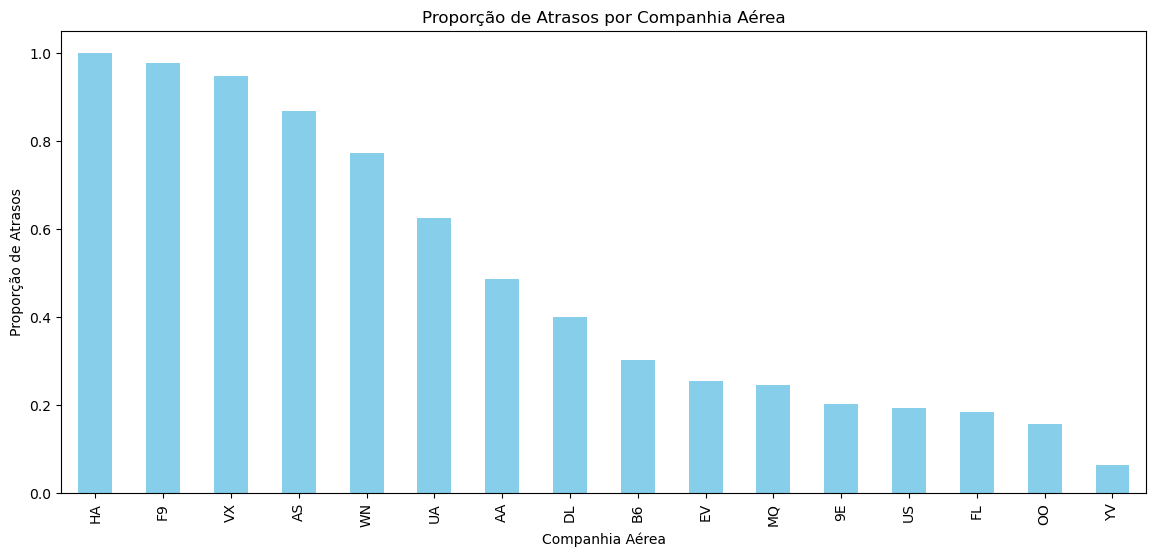

In [38]:
total_voos = df.groupby('companhia_formatted').size()
voos_atrasados = df.loc[df['flg_status'] == "ATRASO"].groupby('companhia_formatted').size()

taxa_atraso = (voos_atrasados / total_voos).sort_values(ascending=False)

fig = plt.figure(figsize=(14, 6))
taxa_atraso.plot(kind='bar', color='skyblue')
plt.title('Proporção de Atrasos por Companhia Aérea')
plt.xlabel('Companhia Aérea')
plt.ylabel('Proporção de Atrasos')
plt.show()

fig.savefig("images/p1/proporcao.png")

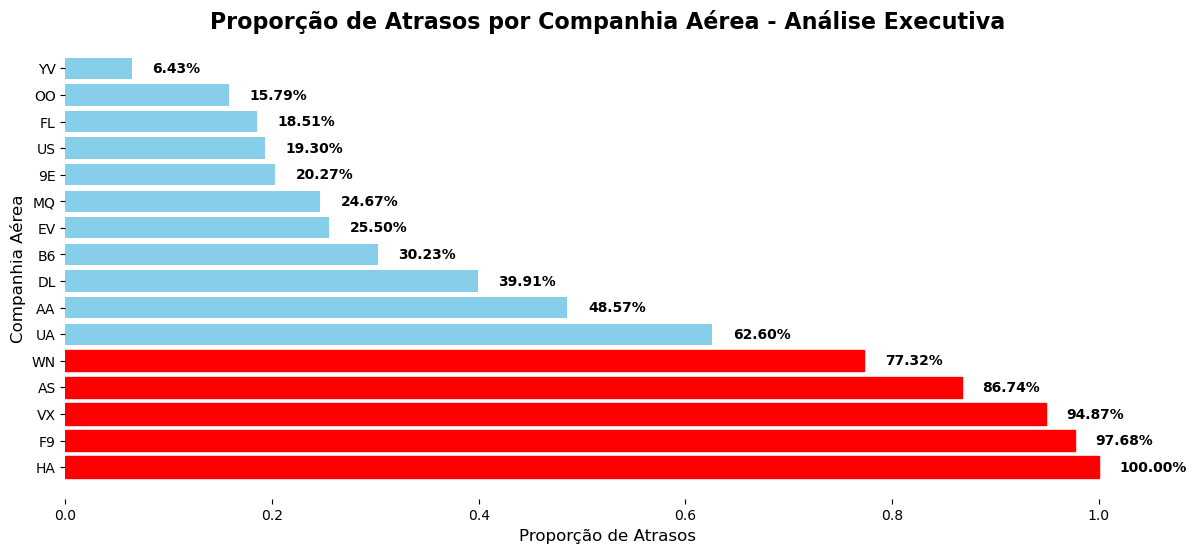

In [39]:
total_voos = df.groupby('companhia_formatted').size()
voos_atrasados = df.loc[df['flg_status'] == "ATRASO"].groupby('companhia_formatted').size()

taxa_atraso = (voos_atrasados / total_voos).sort_values(ascending=False)

fig = plt.figure(figsize=(14, 6))
bars = plt.barh(taxa_atraso.index, taxa_atraso.values, color='skyblue')

for ranking in range(0,5):
    bars[ranking].set_color('red')

for i, v in enumerate(taxa_atraso.values):
    plt.text(v + 0.02, i, f'{v:.2%}', color='black', va='center', fontweight='bold')

plt.title('Proporção de Atrasos por Companhia Aérea - Análise Executiva', fontsize=16, fontweight='bold')
plt.xlabel('Proporção de Atrasos', fontsize=12)
plt.ylabel('Companhia Aérea', fontsize=12)

plt.grid(False)
plt.box(False)

plt.show()

fig.savefig("images/p1/proporcao_executiva.png")

A análise dos dados de voos revelou que cinco companhias aéreas se destacam negativamente em termos de pontualidade. **HA** lidera com a maior proporção de atrasos, seguida de perto por **F9** e **VX**, ambas apresentando índices significativos de atrasos que podem comprometer a satisfação dos passageiros e a eficiência operacional. **AS** e **WN** completam a lista, também registrando altos percentuais de voos atrasados. Essas companhias precisam revisar suas operações e identificar as causas subjacentes para melhorar a pontualidade e reduzir os impactos negativos em seus serviços.

## Pergunta 2
* A rota ou aeronave podem influenciar nos atrasos?

In [40]:
df

,data_voo,companhia_formatted,id_voo_formatted,id_aeronave_formatted,datetime_partida_formatted,datetime_chegada_formatted,origem_formatted,destino_formatted,tempo_voo,distancia,tempo_voo_esperado,tempo_voo_hr,atraso,dia_semana,horario,flg_status
0,2013-01-01,DL,461,N668DN,2013-01-01 05:54:00,2013-01-01 08:12:00,LGA,ATL,116.0,762.0,2.300000,1.933333,-0.366667,1,MADRUGADA,ONTIME
1,2013-01-01,B6,507,N516JB,2013-01-01 05:55:00,2013-01-01 09:13:00,EWR,FLL,158.0,1065.0,3.300000,2.633333,-0.666667,1,MADRUGADA,ONTIME
2,2013-01-01,B6,79,N593JB,2013-01-01 05:57:00,2013-01-01 08:38:00,JFK,MCO,140.0,944.0,2.683333,2.333333,-0.350000,1,MADRUGADA,ONTIME
3,2013-01-01,AA,301,N3ALAA,2013-01-01 05:58:00,2013-01-01 07:53:00,LGA,ORD,138.0,733.0,1.916667,2.300000,0.383333,1,MADRUGADA,ONTIME
4,2013-01-01,B6,49,N793JB,2013-01-01 05:58:00,2013-01-01 08:49:00,JFK,PBI,149.0,1028.0,2.850000,2.483333,-0.366667,1,MADRUGADA,ONTIME
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165499,2013-09-30,UA,471,N578UA,2013-09-30 22:33:00,2013-10-01 01:12:00,EWR,SFO,318.0,2565.0,2.650000,5.300000,2.650000,0,NOITE,ATRASO
165500,2013-09-30,B6,1083,N804JB,2013-09-30 22:35:00,2013-10-01 00:59:00,JFK,MCO,123.0,944.0,2.400000,2.050000,-0.350000,0,NOITE,ONTIME
165501,2013-09-30,B6,234,N318JB,2013-09-30 22:37:00,2013-09-30 23:45:00,JFK,BTV,43.0,266.0,1.133333,0.716667,-0.416667,0,NOITE,ONTIME
165502,2013-09-30,B6,486,N346JB,2013-09-30 22:41:00,2013-09-30 23:45:00,JFK,ROC,47.0,264.0,1.066667,0.783333,-0.283333,0,NOITE,ONTIME


In [41]:
df["rota"] = df["origem_formatted"] + "-" + df["destino_formatted"]

In [42]:
df

,data_voo,companhia_formatted,id_voo_formatted,id_aeronave_formatted,datetime_partida_formatted,datetime_chegada_formatted,origem_formatted,destino_formatted,tempo_voo,distancia,tempo_voo_esperado,tempo_voo_hr,atraso,dia_semana,horario,flg_status,rota
0,2013-01-01,DL,461,N668DN,2013-01-01 05:54:00,2013-01-01 08:12:00,LGA,ATL,116.0,762.0,2.300000,1.933333,-0.366667,1,MADRUGADA,ONTIME,LGA-ATL
1,2013-01-01,B6,507,N516JB,2013-01-01 05:55:00,2013-01-01 09:13:00,EWR,FLL,158.0,1065.0,3.300000,2.633333,-0.666667,1,MADRUGADA,ONTIME,EWR-FLL
2,2013-01-01,B6,79,N593JB,2013-01-01 05:57:00,2013-01-01 08:38:00,JFK,MCO,140.0,944.0,2.683333,2.333333,-0.350000,1,MADRUGADA,ONTIME,JFK-MCO
3,2013-01-01,AA,301,N3ALAA,2013-01-01 05:58:00,2013-01-01 07:53:00,LGA,ORD,138.0,733.0,1.916667,2.300000,0.383333,1,MADRUGADA,ONTIME,LGA-ORD
4,2013-01-01,B6,49,N793JB,2013-01-01 05:58:00,2013-01-01 08:49:00,JFK,PBI,149.0,1028.0,2.850000,2.483333,-0.366667,1,MADRUGADA,ONTIME,JFK-PBI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165499,2013-09-30,UA,471,N578UA,2013-09-30 22:33:00,2013-10-01 01:12:00,EWR,SFO,318.0,2565.0,2.650000,5.300000,2.650000,0,NOITE,ATRASO,EWR-SFO
165500,2013-09-30,B6,1083,N804JB,2013-09-30 22:35:00,2013-10-01 00:59:00,JFK,MCO,123.0,944.0,2.400000,2.050000,-0.350000,0,NOITE,ONTIME,JFK-MCO
165501,2013-09-30,B6,234,N318JB,2013-09-30 22:37:00,2013-09-30 23:45:00,JFK,BTV,43.0,266.0,1.133333,0.716667,-0.416667,0,NOITE,ONTIME,JFK-BTV
165502,2013-09-30,B6,486,N346JB,2013-09-30 22:41:00,2013-09-30 23:45:00,JFK,ROC,47.0,264.0,1.066667,0.783333,-0.283333,0,NOITE,ONTIME,JFK-ROC


In [43]:
contigencia_rota = pd.crosstab(df["rota"],df["flg_status"])
chi2, p_value, dof, expected = chi2_contingency(contigencia_rota)
print(f"P-valor para a relação entre Rota e Atraso: {p_value}")

P-valor para a relação entre Rota e Atraso: 0.0


In [44]:
contigencia_aeronave = pd.crosstab(df["id_aeronave_formatted"], df["flg_status"])
chi2, p_value, dof, expected = chi2_contingency(contigencia_aeronave)
print(f"P-valor para a relação entre Aeronave e Atraso: {p_value}")

P-valor para a relação entre Aeronave e Atraso: 0.0


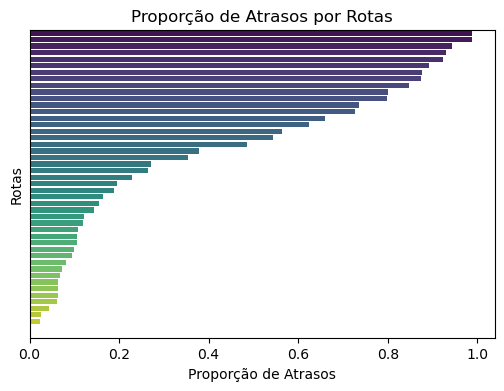

P-valor para a relação entre Aeronave e Atraso: 0.0, 83212.4448010865
quando o valor menor que 0.05 significa que existe uma correlacao


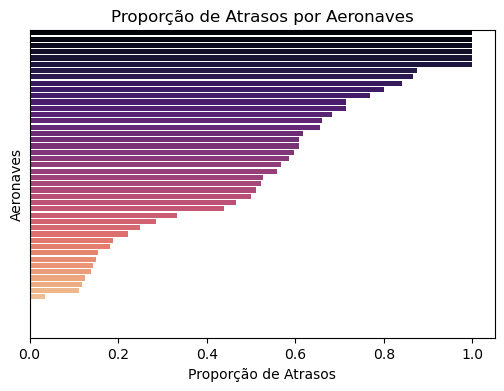

P-valor para a relação entre Aeronave e Atraso: 0.0, 41520.53749307564
quando o valor menor que 0.05 significa que existe uma correlacao


In [50]:
df['atraso_flag'] = df['flg_status'] == 'ATRASO'

df['rota'] = df['origem_formatted'] + '-' + df['destino_formatted']  # Criar a coluna de rota
atrasos_por_rota = df.groupby('rota')['atraso_flag'].mean().sort_values(ascending=False)
atrasos_por_rota = atrasos_por_rota.sample(n=50, replace=True).sort_values(ascending=False)

# Análise por Aeronave
atrasos_por_aeronave = df.groupby('id_aeronave_formatted')['atraso_flag'].mean().sort_values(ascending=False)
atrasos_por_aeronave = atrasos_por_aeronave.sample(n=50, replace=True).sort_values(ascending=False)


# Visualização por Rota
fig = plt.figure(figsize=(6, 4))
sns.barplot(x=atrasos_por_rota.values, y=atrasos_por_rota.index, palette='viridis')
plt.title('Proporção de Atrasos por Rotas')
plt.xlabel('Proporção de Atrasos')
plt.yticks([])
plt.ylabel('Rotas')
plt.show()
fig.savefig("images/p2/proporcao_rota.png")

contigencia_rota = pd.crosstab(df["rota"],df["flg_status"])
chi2, p_value, dof, expected = chi2_contingency(contigencia_rota)
print(f"P-valor para a relação entre Aeronave e Atraso: {p_value}, {chi2}\nquando o valor menor que 0.05 significa que existe uma correlacao")

# Visualização por Aeronave
fig = plt.figure(figsize=(6, 4))
sns.barplot(x=atrasos_por_aeronave.values, y=atrasos_por_aeronave.index, palette='magma')
plt.title('Proporção de Atrasos por Aeronaves')
plt.xlabel('Proporção de Atrasos')
plt.yticks([])
plt.ylabel('Aeronaves')
plt.show()

fig.savefig("images/p2/proporcao_aeronave.png")

contigencia_aeronave = pd.crosstab(df["id_aeronave_formatted"], df["flg_status"])
chi2, p_value, dof, expected = chi2_contingency(contigencia_aeronave)
print(f"P-valor para a relação entre Aeronave e Atraso: {p_value}, {chi2}\nquando o valor menor que 0.05 significa que existe uma correlacao")

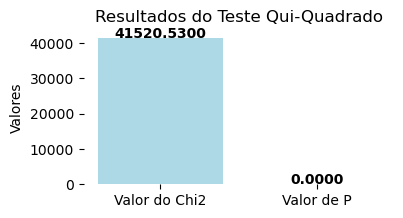

In [46]:
chi2_value = 41520.53 # 41520.53 83212.44
p_value = 0.0000

labels = ['Valor do Chi2', 'Valor de P']
values = [chi2_value, p_value]

fig = plt.figure(figsize=(4, 2))
plt.bar(labels, values, color=['#add8e6', 'orange'])

for i, v in enumerate(values):
    plt.text(i, v + 0.2, f"{v:.4f}", ha='center', fontweight='bold')

plt.title('Resultados do Teste Qui-Quadrado')
plt.ylabel('Valores')
plt.grid(False)
plt.box(False)
plt.show()

fig.savefig("images/p2/qui2_aeronaves.png")

## Pergunta 3

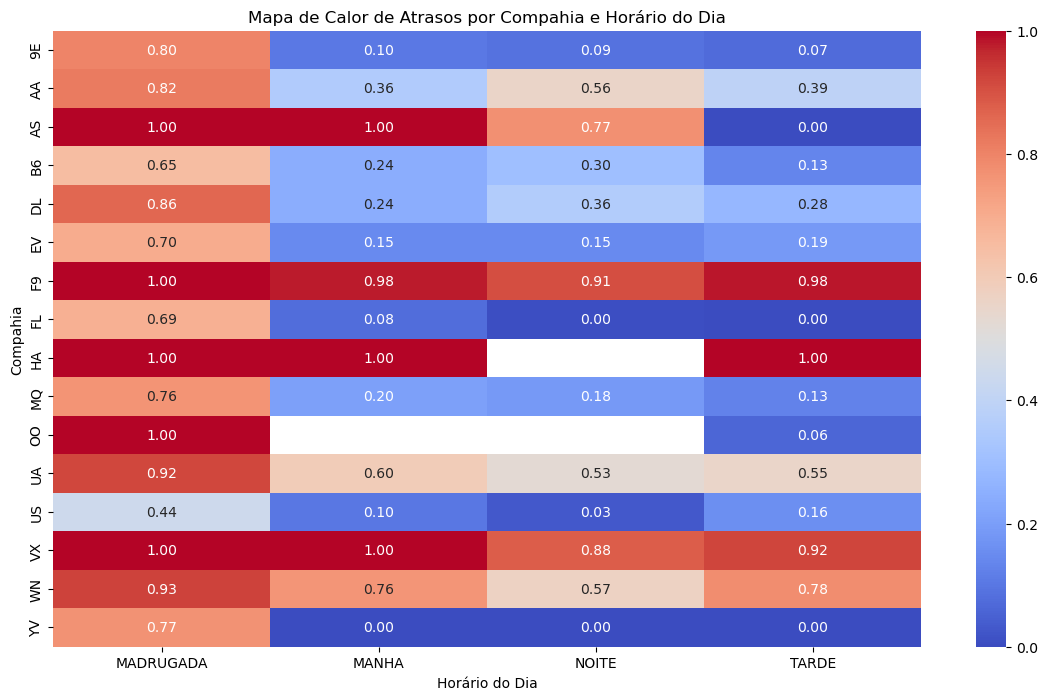

In [51]:
heatmap_data = df.pivot_table(values='atraso_flag', index='companhia_formatted', columns='horario', aggfunc='mean')

fig = plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Mapa de Calor de Atrasos por Compahia e Horário do Dia')
plt.xlabel('Horário do Dia')
plt.ylabel('Compahia')
plt.show()

fig.savefig("images/p3/proporcao_horarios_heatmap.png")


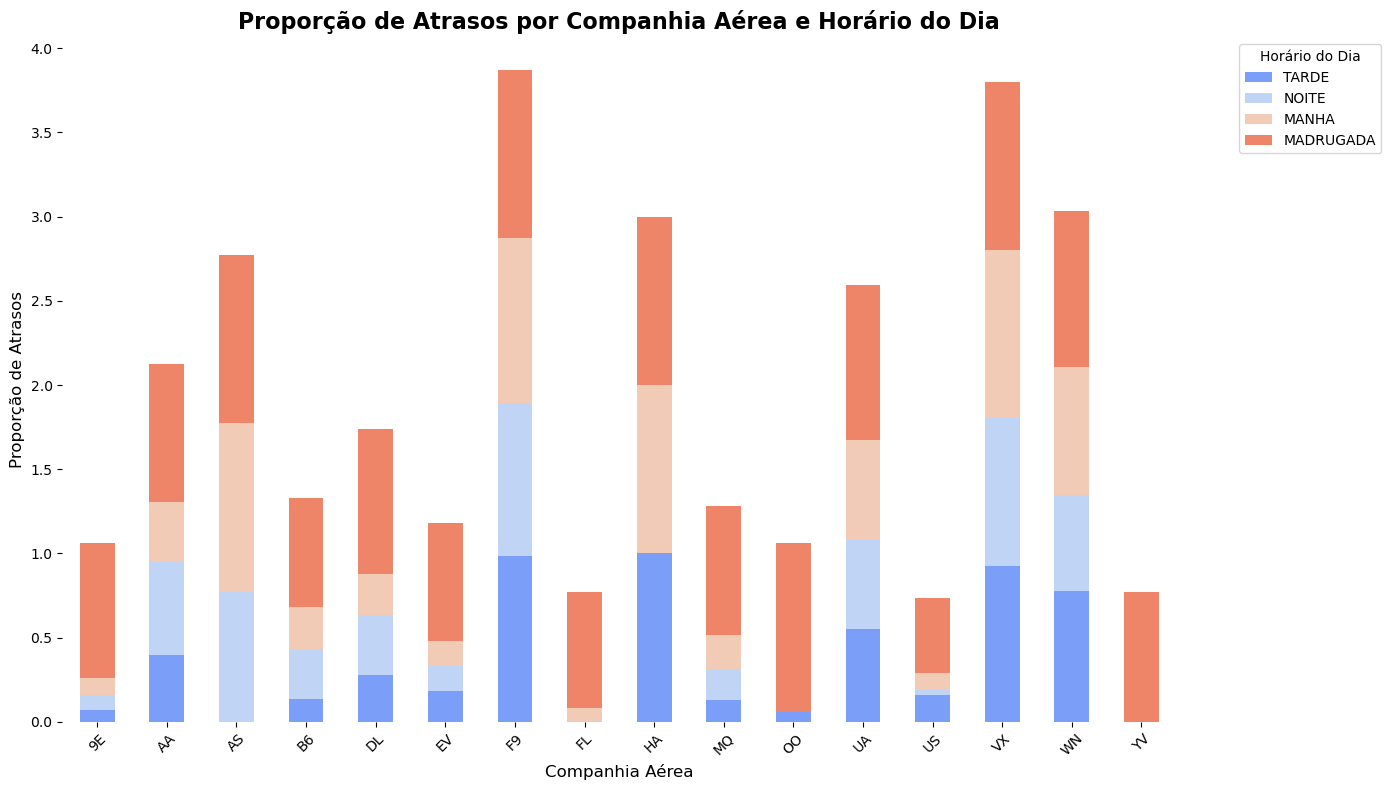

In [48]:
stacked_data = df.pivot_table(values='atraso_flag', index='companhia_formatted', columns='horario', aggfunc='mean')

stacked_data = stacked_data[stacked_data.mean().sort_values().index]

fig, ax = plt.subplots(figsize=(14, 8))

colors = sns.color_palette("coolwarm", n_colors=len(stacked_data.columns))

stacked_data.plot(kind='bar', stacked=True, ax=ax, color=colors)

plt.title('Proporção de Atrasos por Companhia Aérea e Horário do Dia', fontsize=16, fontweight='bold')
plt.xlabel('Companhia Aérea', fontsize=12)
plt.ylabel('Proporção de Atrasos', fontsize=12)
plt.legend(title='Horário do Dia', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(False)
plt.box(False)
plt.show()

fig.savefig("images/p3/proporcao_atrasos_horario.png")